### questões éticas e/ou privacidade que possam ser levantadas

Segundo o portal de Dados abertos da PRF(Polícia Rodoviária Federal )"A elaboração do Plano de Dados Abertos da PRF vem ao encontro do disposto na Lei de Acesso à Informação (LAI), na Instrução Normativa SLTI nº 4, de 13 de abril de 2012 (que institui a Infraestrutura Nacional de Dados Abertos), no Decreto nº 8.777, de 11 de maio de 2016 (que institui a Política de Dados Abertos no Executivo Federal), bem como dos compromissos assumidos pelo Brasil no âmbito do Plano de Ação Nacional de Governo Aberto"

["Documento CSV de Acidentes 2025"](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)


Os seguintes dados foram extraidos do Portal de Acesso a Informação do Governo Federal e são referentes aos registros de acidentes automobilísticos de 2025 anotados pela Policia Rodoviária Federal. O dataset tem o total de 47192 instâncias e 30 atributos.

A seguir realizaremos a configuração do ambiente para a análise de dados através da importação de bibliotecas e de funções auxiliares para limpeza e enriquecimento de dados e o carregamento do dataset para começar o pré-processamento.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
sys.path.append('../src')
from src.dataset import impute_missing_categorical, convert_data_types, standardize_text_content
from src.features import Add_new_columns
from plots import *


sns.set_theme(style="darkgrid")
data = pd.read_csv("../data/raw/datatran2025.csv",  encoding='latin-1', sep=';')


Uma amostra dos dados.

In [2]:
display(data.head())
display(data.columns)
display(data.shape)
display(data.info())

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

(47192, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      47192 non-null  int64 
 1   data_inversa            47192 non-null  object
 2   dia_semana              47192 non-null  object
 3   horario                 47192 non-null  object
 4   uf                      47192 non-null  object
 5   br                      47192 non-null  int64 
 6   km                      47192 non-null  object
 7   municipio               47192 non-null  object
 8   causa_acidente          47192 non-null  object
 9   tipo_acidente           47192 non-null  object
 10  classificacao_acidente  47191 non-null  object
 11  fase_dia                47192 non-null  object
 12  sentido_via             47192 non-null  object
 13  condicao_metereologica  47192 non-null  object
 14  tipo_pista              47192 non-null  object
 15  tr

None

Verificação dos atributos faltantes através de uma função de agregação.

In [3]:
data.isna().sum()

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                   1
delegacia                 15
uop                       22
dtype: int64

### Limpezas e Transformações

**Conversão de tipos** &nbsp;

A seguir utilizamos a função ```convert_data_types``` que converte tipos de dados (ex: string -> datetime).

In [4]:
data = convert_data_types(data)

**Preenchendo colunas que tem dados faltando (delegacia, uop, regional)** &nbsp;

Utilizamos a função ```impute_missing_categorical``` que preeenche valores faltantes de colunas categoricas.

In [5]:
data = impute_missing_categorical(data)
data.isna().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

Agora nós temos o dataset com os dados convertidos e sem dados categorigos faltantes.

**Adicionando novas colunas para auxiliar na visualização**&nbsp;

Utilizamos a função ```Add_new_columns``` para adicionar uma nova coluna no dataset.

In [6]:
data = Add_new_columns(data)

**Padronizando conteudo das colunas de texto**&nbsp;

Utilizamos a função ```standardize_text_content``` para realizar a padronização das colunas textuais do dataset.

In [7]:
data = standardize_text_content(data)

### Analise Exploratória

A seguir vamos utilizar a função ```describe``` para obter algumas métricas como contagem de registros, média, mediana, minimos, máximos e distribuições por quartis.

In [8]:
display(data.describe())


,id,data_inversa,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,47192.000000,47192,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000,47192.000000
mean,685321.198275,2025-05-04 11:34:31.266316288,208.506039,260.243696,2.595631,0.084209,0.872584,0.275131,1.056302,0.395660,1.147716,2.004535
min,652468.000000,2025-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,665804.750000,2025-03-06 00:00:00,101.000000,75.675000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,689988.500000,2025-05-06 00:00:00,156.000000,193.550000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,702825.250000,2025-07-04 00:00:00,319.000000,411.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,719768.000000,2025-08-31 00:00:00,495.000000,1257.000000,71.000000,11.000000,41.000000,22.000000,71.000000,81.000000,49.000000,82.000000
std,19871.776657,NaN,128.448197,228.212510,2.204647,0.337939,1.015976,0.603292,1.805962,0.894184,1.117072,1.153761


Para uma elucidação das principais causa de acidente utilizamos a função ```value_counts``` na coluna ```causa_aciente``` que retorna a contagem de registros baseados na causa do acidente.

In [9]:
data['causa_acidente'].value_counts()

causa_acidente
ausência de reação do condutor                               7327
reação tardia ou ineficiente do condutor                     6999
acessar a via sem observar a presença dos outros veículos    4640
condutor deixou de manter distância do veículo da frente     2908
velocidade incompatível                                      2664
                                                             ... 
faróis desregulados                                             6
redutor de velocidade em desacordo                              5
semáforo com defeito                                            5
sistema de drenagem ineficiente                                 2
sinalização encoberta                                           1
Name: count, Length: 69, dtype: int64

Utilizamos da mesma função para verificar a classificação dos acidentes.

In [10]:
data['classificacao_acidente'].value_counts()

classificacao_acidente
com vítimas feridas    36494
sem vítimas             7276
com vítimas fatais      3421
desconhecido               1
Name: count, dtype: int64

Aqui temos a contagem por tipos de acidente.

In [11]:
data['tipo_acidente'].value_counts()

tipo_acidente
colisão traseira                  9373
saída de leito carroçável         6532
colisão transversal               6172
colisão lateral mesmo sentido     5034
tombamento                        4093
colisão com objeto                3318
colisão frontal                   3110
queda de ocupante de veículo      2279
atropelamento de pedestre         1986
colisão lateral sentido oposto    1424
incêndio                          1156
capotamento                        863
engavetamento                      831
atropelamento de animal            759
eventos atípicos                   192
derramamento de carga               65
sinistro pessoal de trânsito         5
Name: count, dtype: int64

**Resumo do Conjunto de Dados:**

- **Total de Amostras (Linhas):** 47192
- **Total de Atributos (Colunas):** 30
- **Período de tempo:** 01/01/2025 a 31/08/2025

#### Quais são as 5 principais causas de acidente que mais geraram mortes (soma de mortos) nesse período?

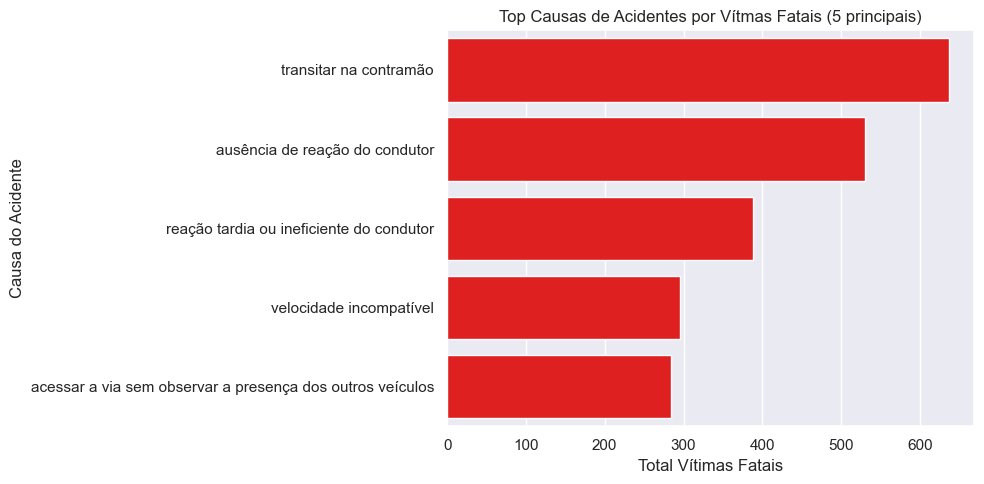

In [12]:
plot_principais_acidentes(data, top_n=5)

#### Quais são os 10 estados (UF) com o maior número absoluto de acidentes registrados no periodo?

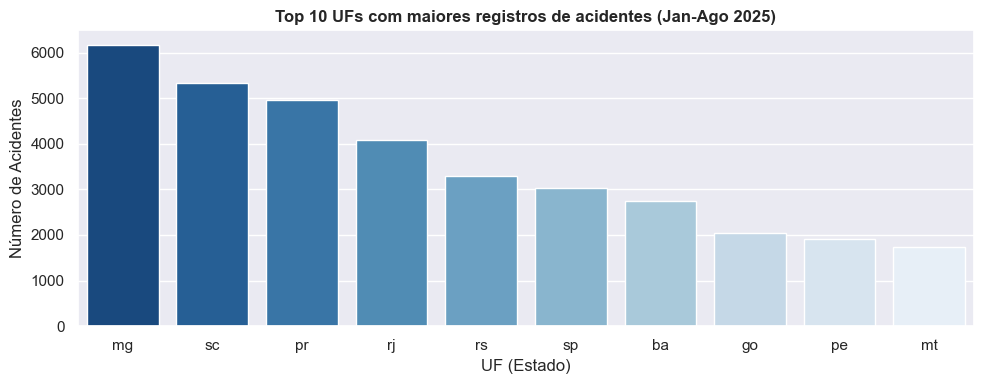

In [13]:
plot_por_uf(data)

#### Houve uma tendência de aumento ou queda no número de acidentes ao longo dos 8 meses (Janeiro a Agosto de 2025)?

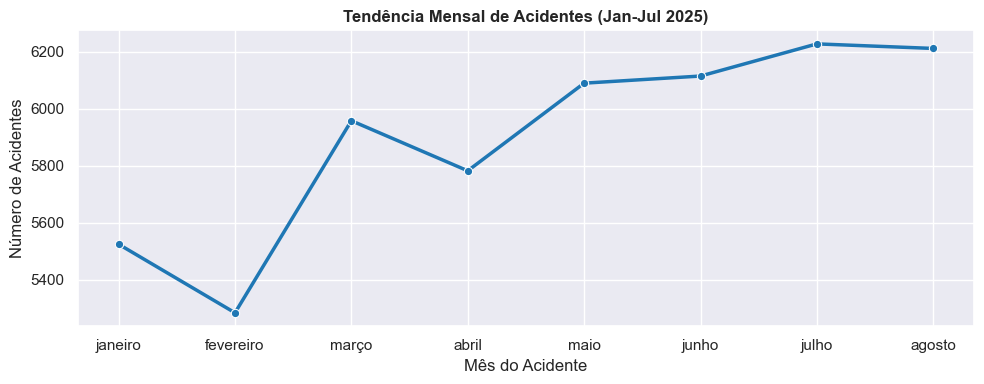

In [14]:
plot_tendencias(data)

#### Houve uma tendência de aumento ou queda no número de acidentes ao longo da semana? Ocorrem mais acidentes nos fins de semana?


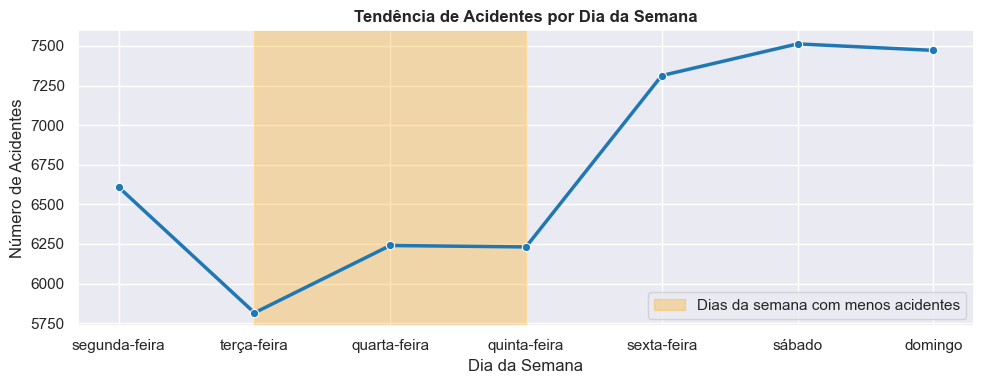

In [15]:
plot_tendencia_dias(data)

O tipo do acidente (ex: Colisão frontal, Saída de pista) mais fatal é o mesmo nos dias de semana e nos fins de semana?

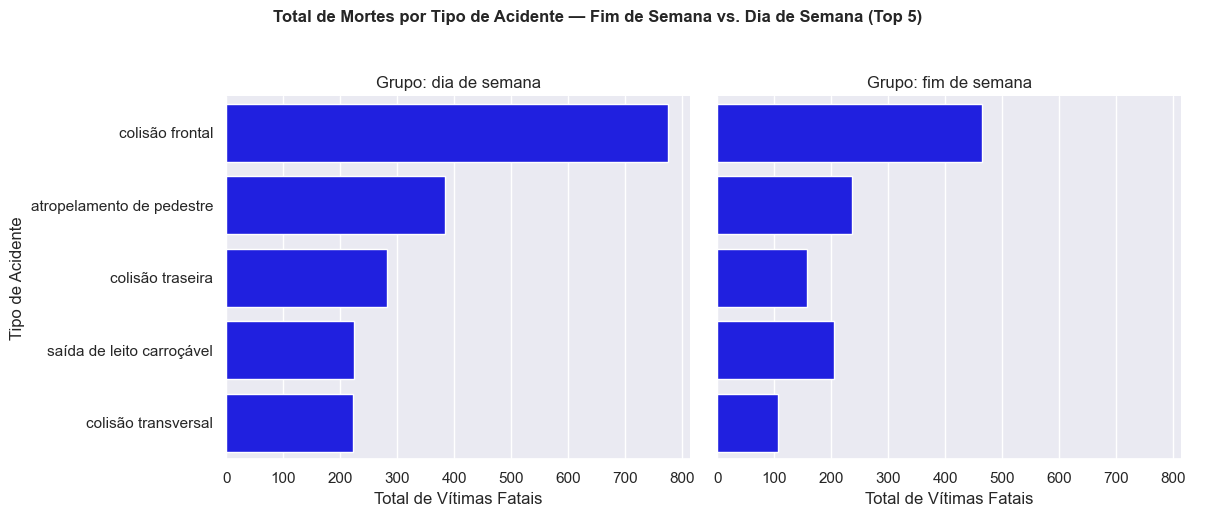

In [16]:
plot_mortes_por_dia_e_tipo(data)